# Loading  libraries

In [319]:
import numpy as np
import array
import matplotlib.pyplot as plt
from scipy import signal
import scipy.integrate as integrate
from matplotlib import colors as mcolors
from __future__ import division
# colors = ["black","cyan","darkmagenta","orange","red","blue","darkred","khaki","brown","pink"]
from collections import defaultdict

def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
import seaborn as sns
colors = sns.color_palette("colorblind", 40).as_hex()


# Making the initial conditions

In [483]:
np.float128(np.pi)

3.141592653589793116

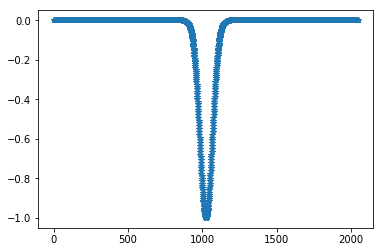

('Should be 0 for the symmetric case: ', 2.0139113888973968e-129)
('The second derivative at minimum is:', 0.00056466356758178016)
('The second analytical derivative at minimum is:', 3.764955292163604e-05)


In [490]:
n_grid = 2**11 # size of data array, number of points for the IC in 1D
# phi0 = 1.e-4
# myseed = 444
# binfac = 4**5
# f5=open('./real_pi.txt', 'w')
# np.random.seed(seed=myseed)
# Ma
phism=np.zeros(n_grid) # phism is going to be phi in comsology and is made either as a random noise or a given function for the study
# sigma=np.sqrt(sigmax2)
# for i in range( int((n_grid)/2) ):
for i in range( 0,n_grid ):

#     if i<=(nx-1)/2:
#     phism[i]=-1.0*np.cos(np.pi*4.0*i/n_grid) # taking phi initially as cosine function for half od the data
#     phism[i]=-1*np.exp(-0.8*(i-n_grid/2)**2/n_grid) # taking phi initially as cosine function for half od the data
#     phism[i]=-0.1*(i-n_grid/2)**2/n_grid # taking phi initially as cosine function for half od the data
    phism[i]=-1.0*np.float128(np.exp(-30.0*(2.0* np.float128(np.pi)*(i-n_grid/2.0)/n_grid)**2)) # taking phi initially as cosine function for half od the data
#     phism[i]=-(1+np.cos((i-n_grid/2)/n_grid))**2/4. # taking phi initially as cosine function for half od the data
#     phism[i]=-2*np.exp(-0.6*(i-n_grid/2)**8/n_grid**2) # taking phi initially as cosine function for half od the data

#     phism[i]=((i-(n_grid/2))/n_grid)**2  # taking phi initially as cosine function for half od the data
#     phism[n_grid-1-i]=phism[i] # the other half are made in a way that to make the data symmetric.
        
# # np.savetxt("real_phi.txt",phism)
# spec = np.abs(np.fft.fft(phism))**2 # computing the spectrum which is absolute value of Forier transformation
# freqs = np.fft.fftfreq(len(phism)) # discrete frequencies associated to the length of the field

# pi  = phism # In case we want to set at the initial time pi = phi otherwise it is set by the PDE, like in the 3D case. 
# phism = 1.e-5 * (phism);
plt.plot(phism,"*")
plt.show()
#Making sure that the made data is symmetric
for i in range(n_grid):
    ss=+phism[n_grid-i-1]-phism[i]
print("Should be 0 for the symmetric case: ", ss) # Has to be 0 otherwise the data is not symmetric
phism[0]
dx=1
print("The second derivative at minimum is:",np.max((np.roll(phism,1)+np.roll(phism,-1)-2.0*phism)/dx**2))
print("The second analytical derivative at minimum is:",np.pi**2*16/(n_grid**2))



In [495]:
# for i in range (n_grid):
i=1021
print(i,phism[i])
# 1020 -0.995492244216429
#        1021 -0.997461881660762
#        1022 -0.998871151042239
#        1023 -0.999717668216209
#        1024  -1.00000000000000

(1021, -0.99746188166076155)


# Solving the PDE

In [506]:

###########################
##### Parameters for kessence:##
###########################
tauin = 0.0;
dt    = 0.005# cs2 = 50 #1.e-3
dx  = 1.
N_prints = 20
tauend = 95.0 #100.0
tauwrite=(tauend-tauin)/N_prints
tau = tauin

data = nested_dict(3, list)



###########################
##### Coefficent ##
###########################
A = 1.0;
B = 0.0;



###########################
##### Initial conditions:##
###########################
num = 0
pi   = phism #phism
pi_t = np.zeros(n_grid)
pi_tt = np.zeros(n_grid)


###########################
##### simulation 1+1 D##
###########################
while (tau < tauend and np.abs(np.max(pi))<1.e6 ):
    ######Rolling#########
    pi_plus  = np.roll(pi,-1)
    pi_2plus  = np.roll(pi,-2)
    pi_minus = np.roll(pi,1)
    pi_2minus = np.roll(pi,2);

    laplacepi = ((-pi_2plus + 16*pi_plus -30.0*pi + 16*pi_minus-pi_2minus)/(12.0*dx**2));
#     laplacepi_1 = ((-pi_2_plus + 16*piplus -30.0*pi + 16*piminus-pi_2minus)/(12.0*dx**2));
#     laplacepi_2 = ((1*piplus -2.0*pi + 1*piminus)/(1.0*dx**2));
    dpi_dx = (pi_2minus - pi_2plus - 8*pi_minus + 8*pi_plus -0.*pi)/(12.0*dx);

    if (tau==tauin or np.abs(np.int(tau/tauwrite)-tau/tauwrite)<dt/tauwrite or tau==tauin):

        data[num]['pi'] = pi
        data[num]['pi_t'] = pi_t
        data[num]['pi_tt'] = pi_tt
        data[num]['pi_xx'] = laplacepi
        data[num]['pi_x'] = dpi_dx
        data[num]['t'] = tau
        
        print('pi:',pi[np.int(n_grid/2)],"    tau:",tau, " num:",num)
        num+=1;
    #############  PDE solve #########
    gradpi_squared = dpi_dx**2;
    pi_tt =  +A * gradpi_squared + B * laplacepi; 
    pi_t = pi_t + dt*(pi_tt); # pi'
    pi  = pi+dt*(pi_t) # pi
    tau = tau + dt
    if (tau >= tauend or np.abs(np.max(pi))>=1.e6 ):
        
        print('t_b = ',tau)
    


('pi:', -1.0, '    tau:', 0.0, ' num:', 0)
('pi:', -1.0, '    tau:', 4.754999999999921, ' num:', 1)
('pi:', -1.0, '    tau:', 9.500000000000085, ' num:', 2)
('pi:', -1.0, '    tau:', 14.250000000000828, ' num:', 3)
('pi:', -1.0, '    tau:', 19.000000000000504, ' num:', 4)
('pi:', -1.0, '    tau:', 23.75499999999956, ' num:', 5)
('pi:', -1.0, '    tau:', 28.504999999998613, ' num:', 6)
('pi:', -1.0, '    tau:', 33.25499999999856, ' num:', 7)
('pi:', -1.0, '    tau:', 38.00000000000099, ' num:', 8)
('pi:', -1.0, '    tau:', 42.75000000000342, ' num:', 9)
('pi:', -1.0, '    tau:', 47.50000000000585, ' num:', 10)
('pi:', -1.0, '    tau:', 52.25000000000828, ' num:', 11)
('pi:', -1.0, '    tau:', 57.00000000001071, ' num:', 12)
('pi:', -1.0, '    tau:', 61.75000000001314, ' num:', 13)
('pi:', -1.0, '    tau:', 66.50000000001201, ' num:', 14)
('pi:', -1.0, '    tau:', 71.25000000000769, ' num:', 15)
('pi:', -1.0, '    tau:', 76.00000000000337, ' num:', 16)
('pi:', -1.0, '    tau:', 80.754999

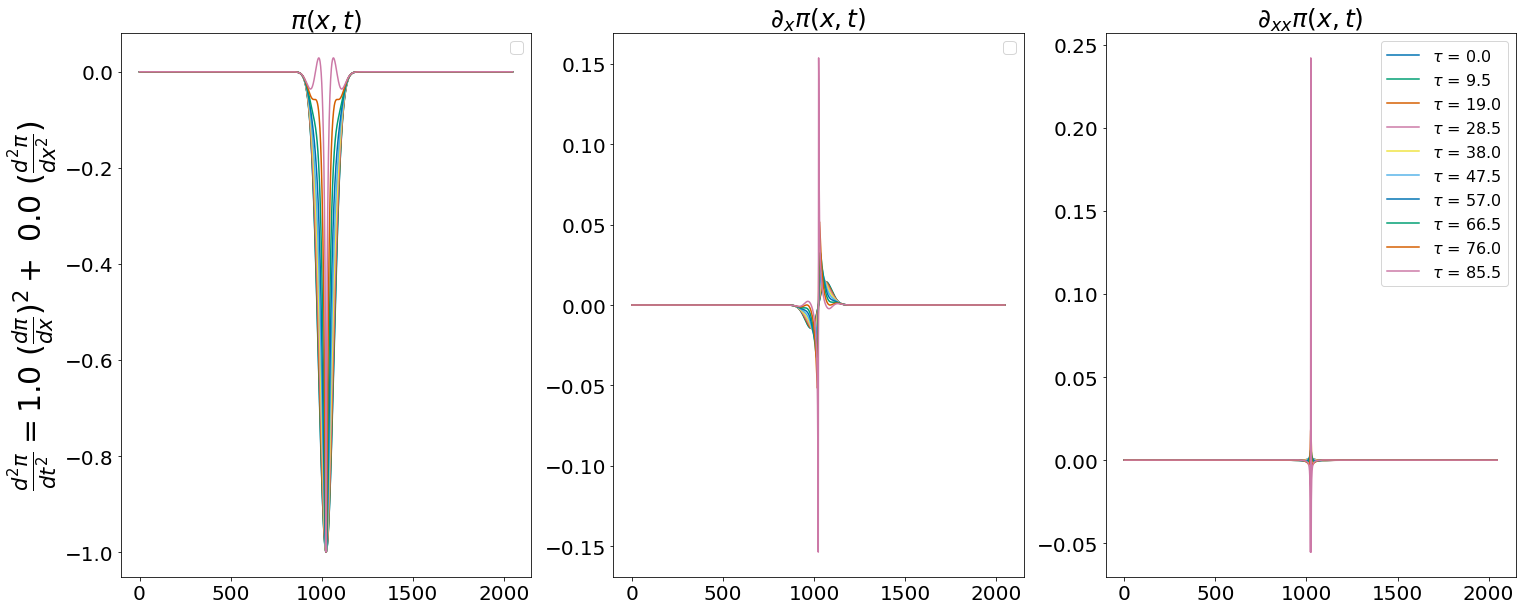

In [507]:

x=np.arange(0,n_grid,1)
fig = plt.figure(figsize=(25,10))
ims  = []

l=0
for i in np.arange(0,19,2):
# for i in [0,int(numbers/tauwrite+1),int(numbers/tauwrite+1)*2,numbers-1]:

    plt.subplot(1,3,1)
    im1, = plt.plot(data[i]['pi'][:],"-",markersize=16,color=colors[l])#,label=r"$\tau$ = "+str(np.round(data[i]['t'],2)))
    plt.ylabel(r"$\frac{d^2\pi}{dt^2} =$"+str(A)+r" $(\frac{d\pi}{dx})^2 + $ "+str(B)+r" $(\frac{d^2\pi}{dx^2})$", fontsize=30)

    plt.tick_params(labelsize=20)
    plt.title("$\pi(x,t)$",fontsize=25)
#     plt.legend(loc='best', bbox_to_anchor=(0.5, 10, 0.5, 0.5))
    plt.legend(fontsize=16)
    plt.subplot(1,3,2)
    im2, = plt.plot(data[i]['pi_x'][:],"-",markersize=16,color=colors[l])#,label=r"$\tau$ = "+str(np.round(data[i]['t'],2)))
#     im2, =plt.plot(list_pi_prime[i][:],"-",markersize=16)
    plt.legend(fontsize=16)
#     plt.ylim(-5.e-5,5.e-5)
    
    plt.tick_params(labelsize=20)
    plt.title(r"$\partial_{x}\pi(x,t)$",fontsize=25)
    #########
    plt.subplot(1,3,3)
    im3, = plt.plot(data[i]['pi_xx'][:],"-",markersize=16,color=colors[l],label=r"$\tau$ = "+str(np.round(data[i]['t'],2)))
#     plt.ylim(-1.e-4,1.e-4)
    plt.tick_params(labelsize=20)
    plt.title(r"$\partial_{xx}\pi(x,t)$",fontsize=25)
    ims.append([im1,im2,im3])
#     plt.plot(x,(np.abs((x-1024)*np.pi/1024)**(4/3)),label=r"t =  "+str(i*1))
#     plt.text(0,0,'dt = 5.e-4\ndx=1/512 ',family='serif',fontsize="14" )
    
#     plt.xlim(1024-40,1024+40)
# ani = animation.ArtistAnimation(fig, ims, interval=900, blit=True,repeat_delay=1000)
    plt.legend(fontsize=16)
    l=l+1;
# plt.savefig('time_derivatives.pdf')
plt.show()
# ani.save('fields_1DBlowup.mp4',dpi=400)

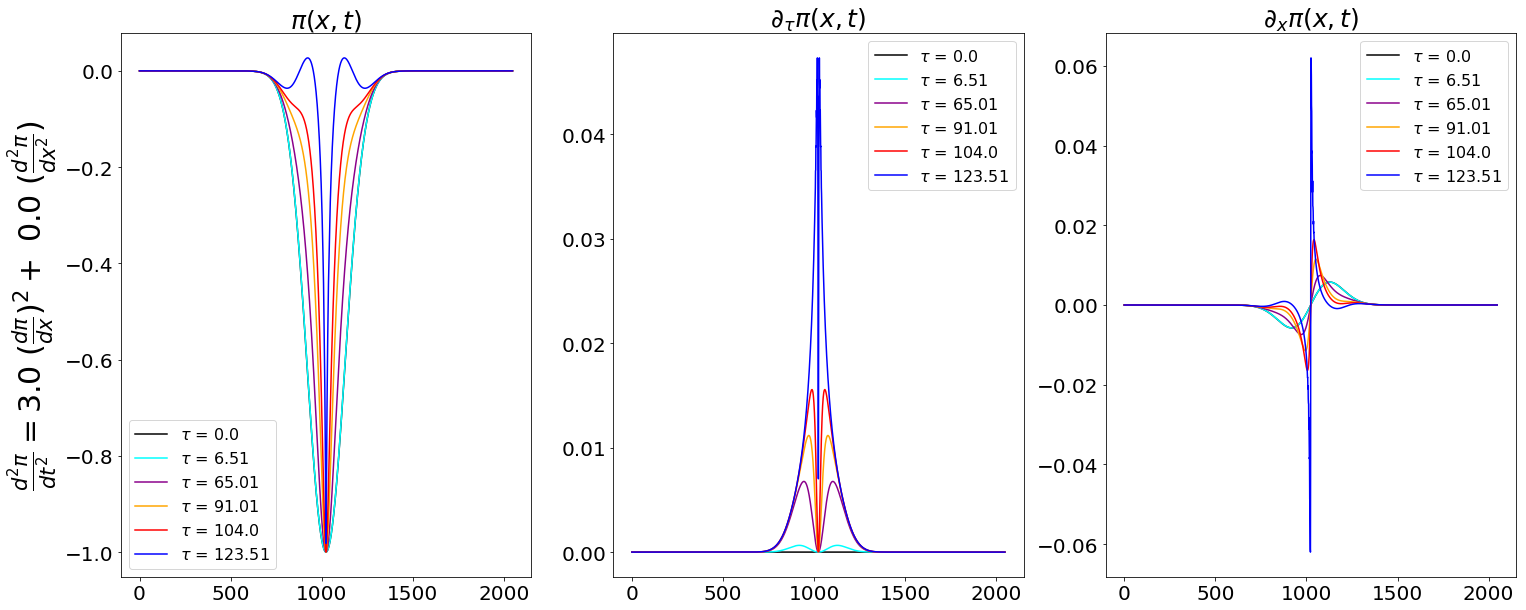

In [287]:

x=np.arange(0,n_grid,1)
fig = plt.figure(figsize=(25,10))
ims  = []

l=0
for i in [0,1,10,14,16,19]:
# for i in [0,int(numbers/tauwrite+1),int(numbers/tauwrite+1)*2,numbers-1]:

    plt.subplot(1,3,1)
    im1, = plt.plot(data[i]['pi'][:],"-",markersize=16,color=colors[l],label=r"$\tau$ = "+str(np.round(data[i]['t'],2)))
    plt.ylabel(r"$\frac{d^2\pi}{dt^2} =$"+str(A)+r" $(\frac{d\pi}{dx})^2 + $ "+str(B)+r" $(\frac{d^2\pi}{dx^2})$", fontsize=30)

    plt.tick_params(labelsize=20)
    plt.title("$\pi(x,t)$",fontsize=25)
#     plt.legend(loc='best', bbox_to_anchor=(0.5, 10, 0.5, 0.5))
    plt.legend(fontsize=16)
    plt.subplot(1,3,2)
    im2, = plt.plot(data[i]['pi_t'][:],"-",markersize=16,color=colors[l],label=r"$\tau$ = "+str(np.round(data[i]['t'],2)))
#     im2, =plt.plot(list_pi_prime[i][:],"-",markersize=16)
    plt.legend(fontsize=16)

    plt.tick_params(labelsize=20)
    plt.title(r"$\partial_{\tau}\pi(x,t)$",fontsize=25)
    #########
    plt.subplot(1,3,3)
    im3, = plt.plot(data[i]['pi_x'][:],"-",markersize=16,color=colors[l],label=r"$\tau$ = "+str(np.round(data[i]['t'],2)))

    plt.tick_params(labelsize=20)
    plt.title(r"$\partial_{x}\pi(x,t)$",fontsize=25)
    ims.append([im1,im2,im3])
#     plt.plot(x,(np.abs((x-1024)*np.pi/1024)**(4/3)),label=r"t =  "+str(i*1))
#     plt.text(0,0,'dt = 5.e-4\ndx=1/512 ',family='serif',fontsize="14" )
    
#     plt.xlim(1024-40,1024+40)
# ani = animation.ArtistAnimation(fig, ims, interval=900, blit=True,repeat_delay=1000)
    plt.legend(fontsize=16)
    l=l+1;
# plt.savefig('time_derivatives.pdf')
plt.show()
# ani.save('fields_1DBlowup.mp4',dpi=400)

# Fitting function and find derivative

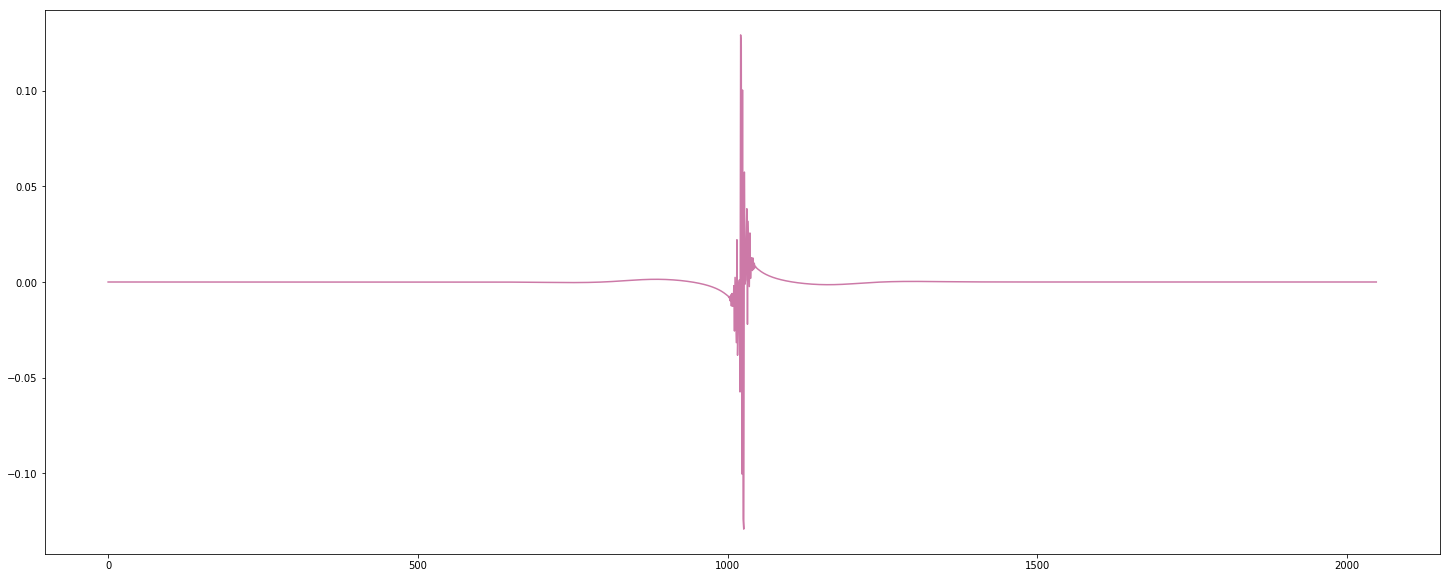

In [336]:

x=np.arange(0,n_grid,1)
fig = plt.figure(figsize=(25,10))
condition = data[i]['pi_x'][:]==0
plt.plot(data[i]['pi_x'][:],"-",markersize=16,color=colors[l],label=r"$\tau$ = "+str(np.round(data[i]['t'],2)))
#     plt.legend(fontsize=16)
#     l=l+1;
# # plt.savefig('time_derivatives.pdf')
# plt.show()
# # ani.save('fields_1DBlowup.mp4',dpi=400)

# ODE solution

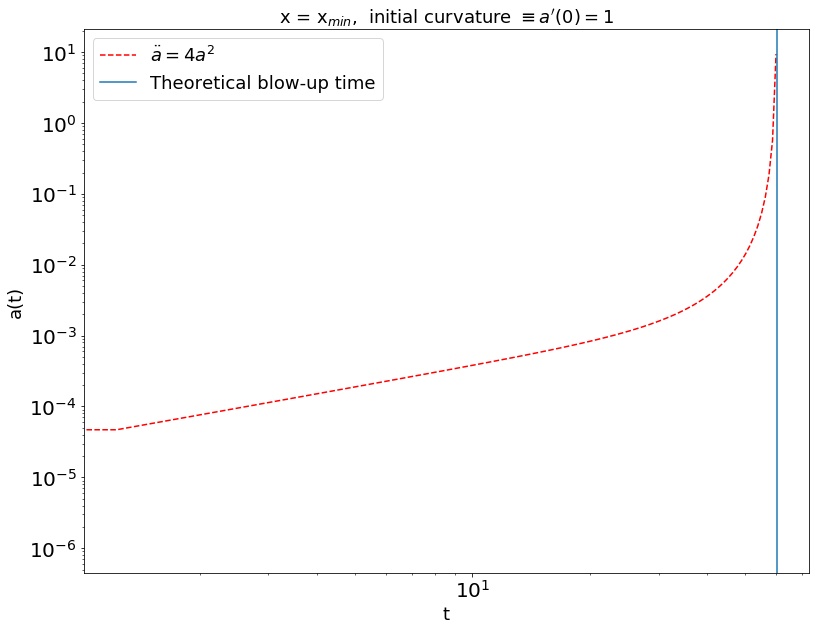

In [589]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,10))
plt.tick_params(labelsize=20)

def model_full(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt = 4.0 * a**2 - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt
def model_peter(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =4.0* a**2 ;
    dzdt = [dadt,dvdt]
    return dzdt
def model_higher(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =  - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt

def model_lin_higher(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt = 1*v*a;
    dzdt = [dadt,dvdt]
    return dzdt

# initial condition
z0 = [0.000001,3.7461536709378539e-05]

# time points
t = np.linspace(0,60)
t2 = np.linspace(0,0.5)
# solve ODE
# z_full = odeint(model_full,z0,t)
z_peter = odeint(model_peter,z0,t)
# z_high = odeint(model_higher,z0,t)
# test = odeint(model_lin_higher,z0,t)

# plot results
# plt.plot(t2,(test[:,0]),'b-',label=r'$\ddot{a} =-4 a^3$')
plt.loglog(t,z_peter[:,0],'r--',label=r'$\ddot{a} = 4 a^2$')

# plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
# plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =a^2-4 a^3$')
plt.axvline(x= 2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )

# plt.yscale('log')
# plt.xlim(0.01,2.2)
plt.ylabel('a(t)',fontsize=18)
plt.title("x = x$_{min}$,  initial curvature $\equiv a'(0) =1$",fontsize=18)
plt.xlabel('t',fontsize=18)
plt.legend(loc='best',fontsize=18)
plt.show()


In [584]:
2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1]))

60.43748240974778

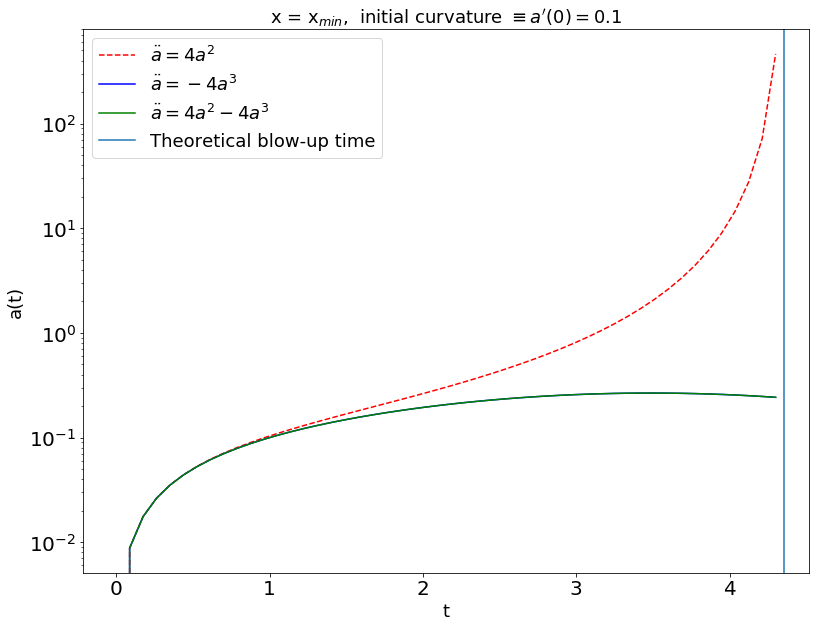

In [575]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,10))
plt.tick_params(labelsize=20)

def model_full(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt = 4.0 * a**2 - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt
def model_peter(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =4.0* a**2 ;
    dzdt = [dadt,dvdt]
    return dzdt
def model_higher(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =  - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt

# initial condition
z0 = [0,0.1]

# time points
t = np.linspace(0,4.3)
t2 = np.linspace(0,4.3)
# solve ODE
z_full = odeint(model_full,z0,t)
z_peter = odeint(model_peter,z0,t)
z_high = odeint(model_higher,z0,t)

# plot results
plt.plot(t,z_peter[:,0],'r--',label=r'$\ddot{a} = 4 a^2$')
plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =4 a^2-4 a^3$')
plt.axvline(x= 2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )

plt.yscale('log')
# plt.xlim(0.01,2.2)
plt.ylabel('a(t)',fontsize=18)
plt.title("x = x$_{min}$,  initial curvature $\equiv a'(0) =$"+str(z0[1]),fontsize=18)
plt.xlabel('t',fontsize=18)
plt.legend(loc='best',fontsize=18)
plt.show()


# ODE for the maxima

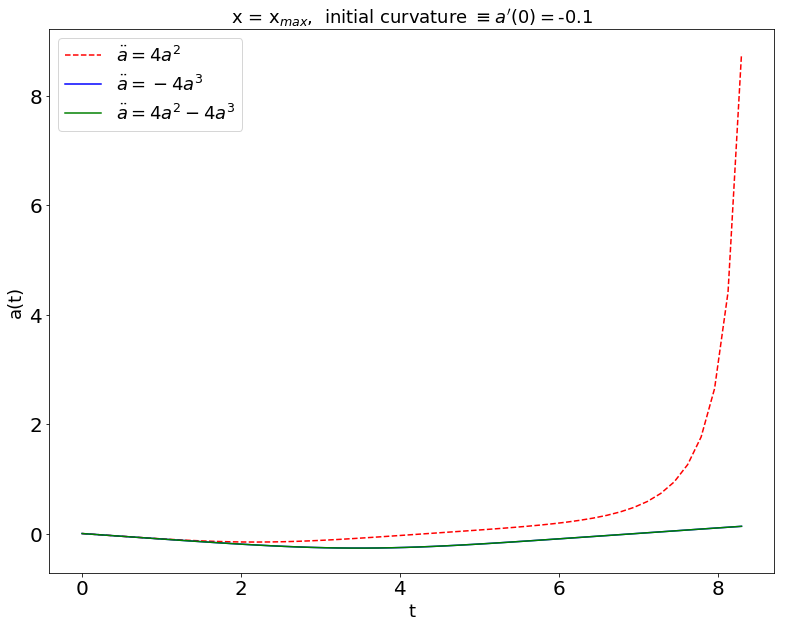

In [89]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,10))
plt.tick_params(labelsize=20)

def model_full(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt = 4.0 * a**2 - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt
def model_peter(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =4.0* a**2 ;
    dzdt = [dadt,dvdt]
    return dzdt
def model_higher(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =  - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt

# initial condition
z0 = [0,-0.1]

# time points
t = np.linspace(0,8.3)
t2 = np.linspace(0,8.3)
# solve ODE
z_full = odeint(model_full,z0,t)
z_peter = odeint(model_peter,z0,t)
z_high = odeint(model_higher,z0,t)

# plot results
plt.plot(t,z_peter[:,0],'r--',label=r'$\ddot{a} = 4 a^2$')
plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =4 a^2-4 a^3$')
# plt.axvline(x= 2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )

# plt.yscale('log')$
# plt.xlim(0.01,2.2)
plt.ylabel('a(t)',fontsize=18)
plt.title("x = x$_{max}$,  initial curvature $\equiv a'(0) =$"+str(z0[1]),fontsize=18)
plt.xlabel('t',fontsize=18)
plt.legend(loc='best',fontsize=18)
plt.show()


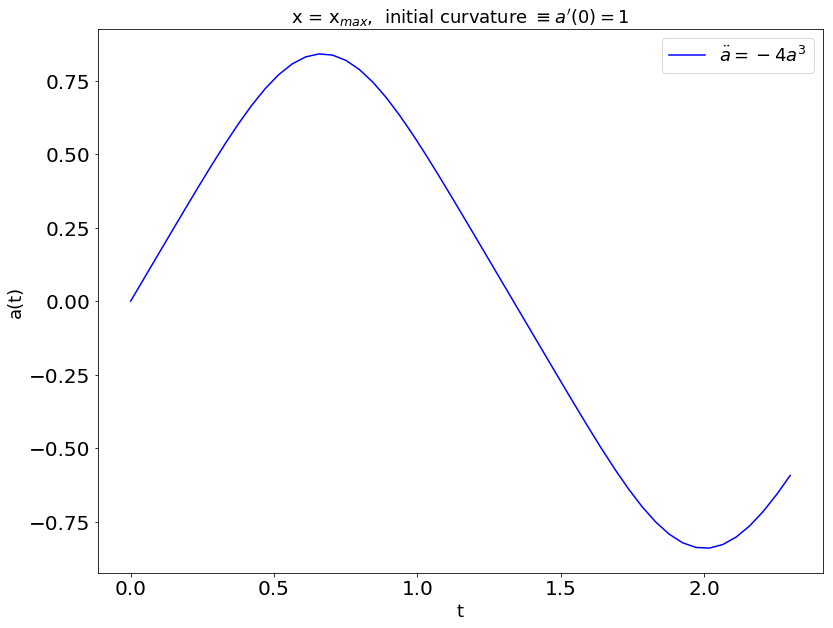

In [112]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,10))
plt.tick_params(labelsize=20)

def model_full(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt = 4.0 * a**2 - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt
def model_peter(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =4.0* a**2 ;
    dzdt = [dadt,dvdt]
    return dzdt
def model_higher(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =  - 4 * a**3;
    dzdt = [dadt,dvdt]
    return dzdt

# initial condition
z0 = [0,1]

# time points
t = np.linspace(0,3.8)
t2 = np.linspace(0,2.3)
# solve ODE
z_full = odeint(model_full,z0,t)
z_peter = odeint(model_peter,z0,t)
z_high = odeint(model_higher,z0,t)

# plot results
# plt.plot(t,z_peter[:,0],'r--',label=r'$\ddot{a} = 4 a^2$')
plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
# plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =4 a^2-4 a^3$')
# plt.axvline(x= 2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )

# plt.yscale('log')$
# plt.xlim(0.01,2.2)
plt.ylabel('a(t)',fontsize=18)
plt.title("x = x$_{max}$,  initial curvature $\equiv a'(0) =$"+str(z0[1]),fontsize=18)
plt.xlabel('t',fontsize=18)
plt.legend(loc='best',fontsize=18)
plt.show()


# Some tests on the FFT

In [ ]:
# Some tests for the Discrete FT: simple test which is easily calculatbale by hand according to X_k = Sigma_n=0^N-1 x_n exp(-2 pi i k n )
test_data = [0,1]
FT_test = np.fft.fft(test_data)
# print("Discrete Fourier transform of:",test_data, " is : ",FT_test)
# Computing the powerspectrum and frequencies:
spec = np.abs(np.fft.fft(test_data))**2 # computing the spectrum which is absolute value of Forier transformation
freqs = np.fft.fftfreq(len(FT_test)) # discrete frequencies associated to the length of the field
print("Data: ",test_data)
print(" discrete Fourier transform : ",FT_test)
print(" Frequencies: ",freqs)
print(" poswer spectrum:", spec,  )
# Very simple example which could easily be checked by hand
# Real space data
#### For illustration
# plt.figure(figsize=(8,6))
# plt.plot(test_data[:],"o",markersize = 8)
# plt.show()
# # FFTW
# plt.figure(figsize=(8,6))
# plt.plot(freqs,FT_test,"o",markersize = 8)
# plt.show()
# # Powerspectrum
# plt.figure(figsize=(8,6))
# plt.plot(np.abs(freqs),spec,"o",markersize = 8)
# plt.show()

#############################
######## Sine, 1/x example ## 
#############################

test_data2  = np.sin(np.arange(1, 100, 1) * 2.0*np.pi/100) # Sampling data from a sine function
# test_data2  = 1./(np.arange(1, 100, 1) * 2.0*np.pi/100) # Sampling data from a sine function

FT_test2 = np.fft.fft(test_data2) # Computing FFTW
# print("Discrete Fourier transform of:",test_data, " is : ",FT_test)
# Computing the powerspectrum and frequencies:
spec2 = np.abs(np.fft.fft(test_data2))**2 # computing the spectrum which is absolute value of Forier transformation
freqs2 = np.fft.fftfreq(len(FT_test2)) # discrete frequencies associated to the length of the field
# print("Data: ",test_data2)
# print(" discrete Fourier transform : ",FT_test2)
# print(" Frequencies: ",freqs2)
# print(" poswer spectrum:", spec2,  )
# Very simple example which could easily be checked by hand
# Real space data
plt.figure(figsize=(8,6))
plt.plot(test_data2[:],".",markersize = 8)
plt.show()
# FFTW
plt.figure(figsize=(8,6))
plt.plot(freqs2,np.abs(FT_test2),".",markersize = 8)
plt.show()
# Powerspectrum
plt.figure(figsize=(8,6))
plt.plot(np.abs(freqs2),spec2,".",markersize = 8)
plt.show()

